In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt



In [4]:
data = {
    "class":[3,1,3,1,3,3,1,3,3,2,3,1,3,3,3,2,3,2,3,3],
    "sex":["male","female","female","female","male","male","male","female","female","male",
           "male","female","female","male","female","female","male","male","female","male"],
    "age":[22,38,26,35,35,27,54,2,27,14,4,58,20,39,14,55,2,23,31,35],
    "sibsp":[1,1,0,1,0,0,0,3,0,1,1,0,0,1,1,0,4,0,1,0],
    "parch":[0,0,0,0,0,0,0,1,2,0,1,0,0,5,0,0,1,0,0,0],
    "fare":[7.25,71.28,7.92,53.1,8.05,8.46,51.86,21.07,11.13,30.07,
            16.7,26.55,8.05,31.27,7.85,16.0,29.13,7.9,18.0,26.0],
    "port":["S","C","S","S","S","Q","S","S","S","C",
            "S","S","S","S","S","S","Q","S","S","S"],
    "survived":[0,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0]
}



In [5]:
df = pd.DataFrame(data)
df = pd.get_dummies(df, columns=["sex","port"], drop_first=True)
X = df.drop("survived", axis=1)
y = df["survived"]


In [6]:
model = RandomForestClassifier(random_state=42)
model.fit(X, y)
pred = model.predict(X)
print("Accuracy:", accuracy_score(y, pred))
print(classification_report(y, pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



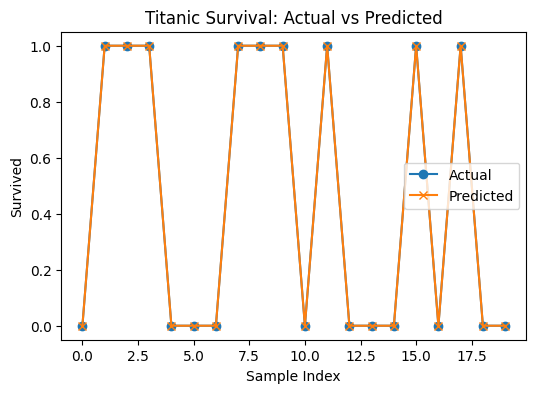

In [7]:
plt.figure(figsize=(6,4))
plt.plot(y.values, label='Actual', marker='o')
plt.plot(pred, label='Predicted', marker='x')
plt.title("Titanic Survival: Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Survived")
plt.legend()
plt.show()
